Monte Carlo Sampling to Find Probability That Center of Circle is in Triangle
========

**David Dallaire - linkedin https://ca.linkedin.com/in/ddallaire**

Sample three random points on the circumference of a circle, and use these to draw a triangle. What is the probability that this triangle includes the center of the circle? Base on the following site:

http://math.stackexchange.com/questions/268635/what-is-the-probability-that-the-center-of-the-circle-is-contained-within-the-tr 

the answer is 0.25. The Monte Carlo sampling below confirms this probability. 

The first step is to sample three points between 0 degrees and 360 degrees from a random uniform distribution. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Polygon
import matplotlib.patches as mpatches
import math
from scipy.spatial import distance

s = np.sort(np.random.uniform(0,360,3))

print(s)


[  67.27150413   73.25323343  278.30255756]


The next step is to devise an algorithm that will determine if the centre of the circle is on the triangle's surface area. One way is to start with the two first sample points: A and B. For A, extend a line through the center of the circle to the opposite side to point $ A^{'} $,forming a diameter. Repeat for B to get $ B^{'} $. Points $ A^{'} $ and $ B^{'} $ delineate an arc on the circle. One criteria for determining if the center of the circle is in the sampled triangle is as follows: (1) it is true if the third sample point in on the arc formed by $ A^{'} $ and $ B^{'}$;  (2) false otherwise.

In [2]:
#plot function
def plot(s):
    aPrime = (s[0] + 180) % 360
   
    bPrime = (s[1] + 180) % 360
   
    isIn = IsInArc(aPrime,bPrime,s[2])
        
    aRad = math.radians(s[0])
    bRad = math.radians(s[1])
    cRad = math.radians(s[2])
    aPrimeRad = math.radians(aPrime)
    bPrimeRad = math.radians(bPrime)


    xa = math.cos(aRad)
    ya = math.sin(aRad)
    xb = math.cos(bRad)
    yb = math.sin(bRad)
    xc = math.cos(cRad)
    yc = math.sin(cRad)

    xaPrime = math.cos(aPrimeRad)
    yaPrime = math.sin(aPrimeRad)
    xbPrime = math.cos(bPrimeRad)
    ybPrime = math.sin(bPrimeRad)

    xArray = np.array([0,xa,xaPrime,xb,xbPrime,xc])
    yArray = np.array([0,ya,yaPrime,yb,ybPrime,yc])


    triangleArray = np.array([[xa,ya],[xb,yb],[xc,yc]])

    #plot circle with center at 0,0
    fig = plt.figure(1)

    fig.suptitle('Is Center of Circle in Triangle? ' + str(isIn),fontsize=20)
    plt.axis([-1.1,1.1,-1.1,1.1])
    ax=fig.add_subplot(1,1,1)
    circle = plt.Circle((0.0,0.0),radius=1,fill=False,color='blue')
    ax.add_patch(circle)


    plt.plot(xArray,yArray,'ro')
    plt.plot(xArray[1:3],yArray[1:3])
    plt.plot(xArray[3:5],yArray[3:5])
    plt.annotate("A",xy = (xArray[1],yArray[1]))
    plt.annotate("A'",xy = (xArray[2],yArray[2]))
    plt.annotate("A",xy = (xArray[1],yArray[1]))
    plt.annotate("B",xy = (xArray[3],yArray[3]))
    plt.annotate("B'",xy = (xArray[4],yArray[4]))
    plt.annotate("C",xy = (xArray[5],yArray[5]))
    triangle = Polygon(triangleArray,alpha=0.4)
    ax.add_patch(triangle)
    
    thetaArray = np.sort(np.array([aPrime,bPrime]))
    
    angelDiff = thetaArray[1] - thetaArray[0]
    
    if angelDiff < 180:
       thetaArray = thetaArray[::-1]
    
    ellipse = Arc([0,0],2,2,angle=0,theta1=thetaArray[0],theta2=thetaArray[1],color='green',linewidth='2')
    ax.add_patch(ellipse)
    ax.set_aspect("equal")
    plt.show()    
    

In [3]:
def IsInArc(A,B,C):
    primeArray = np.sort(np.array([A,B]))
    diffP = primeArray[1] - primeArray[0]

    if diffP < 180:
        isIn = s[2] >= primeArray[0] and s[2] <= primeArray[1]
    else:
        isIn = s[2] <= primeArray[0] or s[2] >= primeArray[1]

    return isIn

In [5]:
#Run Monte Carlo
count = 0
numberOfPaths = 100000

for i in range(0,numberOfPaths):

    s = np.sort(np.random.uniform(0,360,3))

    aPrime = (s[0] + 180) % 360
    bPrime = (s[1] + 180) % 360

    #if aPrime < bPrime:
    #    isIn = aPrime <= s[2] and s[2] <= bPrime
    #else:
    #    isIn = aPrime >= s[2] and s[2] >= bPrime
    
    
    if IsInArc(aPrime,bPrime,s[2]):
        count = count + 1
       
print("Probability is " + str(round(count/numberOfPaths,2)))

Probability is 0.25


In [6]:
#this will return the type of triangle

def TriangleType(s):
    aRad = math.radians(s[0])
    bRad = math.radians(s[1])
    cRad = math.radians(s[2])
    
    xa = math.cos(aRad)
    ya = math.sin(aRad)
    xb = math.cos(bRad)
    yb = math.sin(bRad)
    xc = math.cos(cRad)
    yc = math.sin(cRad)
    
    ab = distance.euclidean((xa,ya),(xb,yb))
    bc = distance.euclidean((xb,yb),(xc,yc))
    ca = distance.euclidean((xc,yc),(xa,ya))

    triangleSides = np.sort(np.array([ab,bc,ca]))
    
    pyThagDiff = triangleSides[2]**2 - (triangleSides[0]**2 + triangleSides[1]**2)

    type = "Acute"
    
    if (pyThagDiff > 0.0):
        type = "Obtuse"
    elif (pyThagDiff == 0.0):
        type = "Square"

    return type

In [116]:
#This section to do hand testing
%matplotlib inline
s = np.sort(np.random.uniform(0,360,3))
#s[0] = 23.89034348
#s[1] = 227.50068777
#s[2] = 273.45969593

#s[0] = 129.62364966
#s[1] = 223.57256605
#s[2] = 298.63178767

#s[0] = 133.69378608
#s[1] = 312.4282278
#s[2] = 337.47042175

aPrime = (s[0] + 180) % 360
bPrime = (s[1] + 180) % 360
#print(s)
#print(aPrime)
#print(bPrime)

primeA = np.sort(np.array([aPrime,bPrime]))
#print(primeA)
diffP = primeA[1] - primeA[0]
#print(diffP)


#if aPrime < bPrime:
#   isIn = aPrime <= s[2] and s[2] <= bPrime
#else:
#   print("FALSE")
#   isIn = s[2] >= aPrime and s[2] >= bPrime

#print(IsInArc(aPrime,bPrime,s[2]))
#print(TriangleType(s))
#print(s)
#plot(s)    
#s = np.sort(np.random.uniform(0,360,3))
#print(s)
#plot(s)

Show a couple of plots. The arc of the circle colored in blue is a criteria neighborhood. If the third point is in this neighborhood, then the center of the circle is in the triangle.

[  27.10582281  120.95212508  294.43131231]


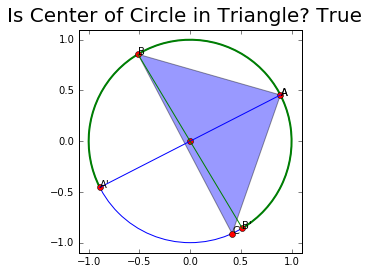

[  17.24464385  147.28068957  353.64324721]


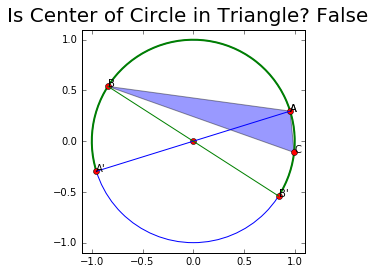

In [118]:
s = np.sort(np.random.uniform(0,360,3))
print(s)
plot(s)

s = np.sort(np.random.uniform(0,360,3))
print(s)
plot(s)  

Try a different criteria here. If the triangle is acute, then it contains its center circle.

In [7]:
#perform monte carlo using acute test

count = 0
numberOfPaths = 100000

for i in range(0,numberOfPaths):

    s = np.sort(np.random.uniform(0,360,3))

    if TriangleType(s) == "Acute":
        count = count + 1
    
print("Probability is " + str(round(count/numberOfPaths,2)))

Probability is 0.25
